Цветкова Алёна

# Анализ Ribo-seq

## Задание 1. Определение дифференциальной экспрессии

### Данные и библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

/Users/alena/.pyenv/versions/3.7.3/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv('data/01. RiboSeq_RNASeq_HCC_counts.tsv', sep='\t')

In [5]:
df.head(5)

,geneID,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
0,ENSG00000000003.14,TSPAN6,0,0,402,873,0,0,301,1627,...,218,457,0,0,200,889,0,0,161,857.0
1,ENSG00000000005.5,TNMD,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,NaN
2,ENSG00000000419.12,DPM1,168,239,88,187,114,439,66,201,...,92,170,109,357,60,244,141,173,56,83.0
3,ENSG00000000457.13,SCYL3,65,121,60,106,36,163,70,156,...,127,176,67,176,55,261,64,100,68,176.0
4,ENSG00000000460.16,C1orf112,8,43,18,70,16,76,4,63,...,124,437,7,167,34,201,6,61,9,58.0


In [6]:
df.isnull().sum()

geneID                 0
geneSymbol             0
LC001-normal-RPF       0
LC001-tumor-RPF        0
LC001-normal-RNA       0
LC001-tumor-RNA        0
LC033-normal-RPF       0
LC033-tumor-RPF        0
LC033-normal-RNA       0
LC033-tumor-RNA        0
LC034-normal-RPF       0
LC034-tumor-RPF        0
LC034-normal-RNA       0
LC034-tumor-RNA        0
LC501-normal-RPF       0
LC501-tumor-RPF        0
LC501-normal-RNA       0
LC501-tumor-RNA        0
LC502-normal-RPF       0
LC502-tumor-RPF        0
LC502-normal-RNA       0
LC502-tumor-RNA        0
LC505-normal-RPF       0
LC505-tumor-RPF        0
LC505-normal-RNA       0
LC505-tumor-RNA        0
LC506-normal-RPF       0
LC506-tumor-RPF        0
LC506-normal-RNA       0
LC506-tumor-RNA        0
LC507-normal-RPF       0
LC507-tumor-RPF        0
LC507-normal-RNA       0
LC507-tumor-RNA        0
LC508-normal-RPF       0
LC508-tumor-RPF        0
LC508-normal-RNA       0
LC508-tumor-RNA        0
LC509-normal-RPF       0
LC509-tumor-RPF        0


Только в одной колонке есть пропущенные значения, заменяю на 0. 

In [7]:
df['LC509-tumor-RNA'] = df['LC509-tumor-RNA'].fillna(0)

### 1.1

Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.

Выбираю корреляцию Спирмена, так как каунты не нормированные (распределение не является нормальным). Оценка будет более робастной с корреляцией спирмена. 

In [8]:
df = df.set_index('geneID')

In [9]:
df_RNA = df[df.columns[df.columns.str.endswith('RNA')]]
df_RPF = df[df.columns[df.columns.str.endswith('RPF')]]

In [10]:
corrs = [spearmanr(df_RNA.iloc[i], df_RPF.iloc[i])[0] for i in range(df.shape[0])]

### 1.2

Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

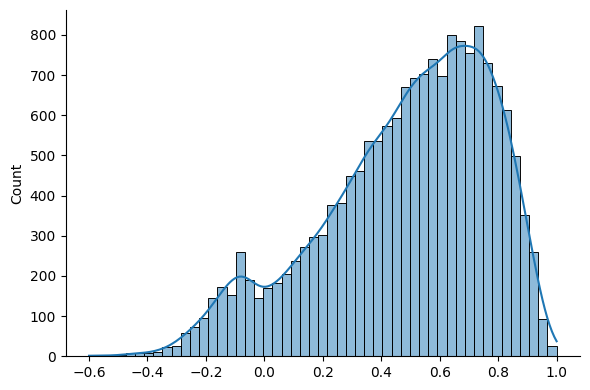

In [11]:
sns.displot(corrs, height=4, aspect=1.5, kde=True);

По гистограмме распределения можно сказать, что у большей части генов каунты RNA-Seq и Ribo-Seq сильно скоррелированы, при чем, корреляция положительная. Есть нескоррелированные значения и отрицательная корреляция, но таких генов меньше

Собираю корреляцию и гены в один датафрейм

In [12]:
corr_genes = pd.DataFrame({'geneSymbol': df.reset_index()['geneSymbol'],
                           'geneID': df.reset_index()['geneID'],
                          'correlation': corrs})

corr_genes['|correlation|'] = np.abs(corr_genes['correlation'])
corr_genes = corr_genes.dropna()
corr_genes = corr_genes.sort_values('|correlation|', ascending=False)

Гены с наиболее высокой корреляцией: 

In [13]:
corr_genes.head(15)

,geneSymbol,geneID,correlation,|correlation|
13613,TRIM60,ENSG00000176979.12,1.000000,1.000000
5495,SCGB1D2,ENSG00000124935.3,1.000000,1.000000
9754,PRG3,ENSG00000156575.2,1.000000,1.000000
8121,KCNA10,ENSG00000143105.6,1.000000,1.000000
13867,DYNAP,ENSG00000178690.2,1.000000,1.000000
17597,ZNF735,ENSG00000223614.5,1.000000,1.000000
13578,MAGEB6,ENSG00000176746.6,1.000000,1.000000
17696,IQCF3,ENSG00000229972.7,1.000000,1.000000
13158,FAM46D,ENSG00000174016.11,1.000000,1.000000
18124,RFPL4B,ENSG00000251258.1,1.000000,1.000000


In [14]:
df[df['geneSymbol'].isin(corr_genes.head(15)['geneSymbol'].to_list())]

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000116690.12,PRG4,4540,1016,1538,252,3185,762,787,162,11711,...,495,23,4083,1257,1033,226,4945,4601,1332,1177.0
ENSG00000124935.3,SCGB1D2,0,0,0,0,0,0,0,0,0,...,1,48,0,0,0,0,0,0,0,0.0
ENSG00000143105.6,KCNA10,0,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0.0
ENSG00000156575.2,PRG3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ENSG00000167910.3,CYP7A1,660,19,267,4,98,1412,42,560,1186,...,10,6,64,9,21,4,42,89,7,32.0
ENSG00000171747.8,LGALS4,239,67,95,14,547,1083,230,459,422,...,95,38,248,913,152,740,209,27,118,30.0
ENSG00000174016.11,FAM46D,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
ENSG00000176040.13,TMPRSS7,0,0,0,0,6,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0.0
ENSG00000176746.6,MAGEB6,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0.0


Большая часть генов с высокой корреляцией не экспрессируется (каунты равны 0).

Гены с наиболее низкой корреляцией: 

In [15]:
corr_genes.tail(15)

,geneSymbol,geneID,correlation,|correlation|
4305,POMC,ENSG00000115138.10,-0.001002,0.001002
13591,GRIN1,ENSG00000176884.14,-0.000939,0.000939
6318,ANKHD1,ENSG00000131503.20,-0.000755,0.000755
9422,UBALD1,ENSG00000153443.12,0.000754,0.000754
6466,PRMT7,ENSG00000132600.16,0.000752,0.000752
18121,ZNF674,ENSG00000251192.7,-0.000382,0.000382
11267,SLITRK5,ENSG00000165300.7,0.000000,0.000000
3845,IFNG,ENSG00000111537.4,0.000000,0.000000
16675,AGAP9,ENSG00000204172.12,0.000000,0.000000
7912,PRELID3A,ENSG00000141391.13,0.000000,0.000000


In [16]:
df[df['geneSymbol'].isin(corr_genes.tail(15)['geneSymbol'].to_list())]

,geneSymbol,LC001-normal-RPF,LC001-tumor-RPF,LC001-normal-RNA,LC001-tumor-RNA,LC033-normal-RPF,LC033-tumor-RPF,LC033-normal-RNA,LC033-tumor-RNA,LC034-normal-RPF,...,LC507-normal-RNA,LC507-tumor-RNA,LC508-normal-RPF,LC508-tumor-RPF,LC508-normal-RNA,LC508-tumor-RNA,LC509-normal-RPF,LC509-tumor-RPF,LC509-normal-RNA,LC509-tumor-RNA
geneID,,,,,,,,,,,,,,,,,,,,,
ENSG00000100242.15,SUN2,730,738,1318,324,970,1790,1419,940,1576,...,1642,357,411,1112,1518,939,549,778,1253,1427.0
ENSG00000111537.4,IFNG,0,0,0,0,0,0,0,0,2,...,0,2,0,0,1,2,0,2,0,0.0
ENSG00000115138.10,POMC,0,0,6,0,0,6,19,1,5,...,21,1,0,0,2,2,0,0,3,2.0
ENSG00000131503.20,ANKHD1,5,1,20,34,0,14,74,36,2,...,58,116,4,0,44,47,3,3,41,112.0
ENSG00000132600.16,PRMT7,54,95,92,44,35,170,73,71,144,...,161,96,51,120,109,97,47,87,52,137.0
ENSG00000139675.11,HNRNPA1L2,0,0,4,7,0,0,0,6,0,...,7,5,0,0,0,6,3,0,4,15.0
ENSG00000141391.13,PRELID3A,0,0,3,1,0,3,14,0,5,...,7,6,0,3,1,9,0,2,2,2.0
ENSG00000153443.12,UBALD1,14,50,103,21,37,109,116,95,65,...,203,91,25,3,203,14,17,14,112,65.0
ENSG00000154479.12,CCDC173,0,1,4,1,0,0,0,1,0,...,0,1,0,0,1,3,2,0,1,0.0


У генов с низкой корреляцией также много нулевых каунтов. Возможно низкая корреляция связана с тем, что для RNA 0 каунтов, а для RPF больше 0 и наоборот. Они могут так различаться от экспрессии. Например, при RPF = 0, а RNA > 0, когда для трансляции нужно много мРНК. При RPF > 0, а RNA = 0, может объяснять механизмы, влияющие на белок после его синтеза. 

### 1.3 

Проанализируйте распределение каунтов Ribo-seq: постройте зависимость дисперсии от среднего. Похоже ли это на NB-распределение? Если нет, то на какое похоже? Если да, то какие статистические тесты можно использовать для подтверждения того, что перед вами NB-распределение?

In [17]:
var_rpf = df_RPF.var(axis=1)
mean_rpf = df_RPF.mean(axis=1)

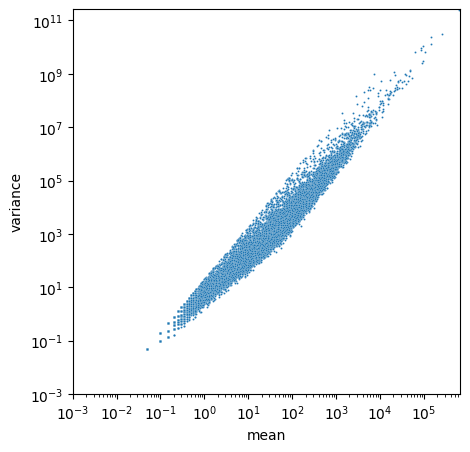

In [18]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot(x=mean_rpf, y=var_rpf, s=2)

ax.set_xlim(0.001)
ax.set_ylim(0.001)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('mean')
ax.set_ylabel('variance');

Похоже на Nb распределение. Можно использовать ks test о равенстве теоретического и наблюдаемого распределений, предварительно сгенерировав выборку Nb распределения с помощью scipy.stats.nbinom